In [22]:
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings for cleaner output

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
import plotly.graph_objects as go  # For interactive plotting
from plotly.offline import init_notebook_mode  # For initializing Plotly in Jupyter
init_notebook_mode(connected=True)  # Enable Plotly to work offline in Jupyter Notebooks
from plotly.subplots import make_subplots  # For creating subplots in Plotly

from sklearn.preprocessing import MinMaxScaler  # For scaling data

import torch  # PyTorch library for deep learning
import torch.nn as nn  # For neural network modules
import torch.optim as optim  # For optimization algorithms
from torch.utils.data import TensorDataset, DataLoader  # For dataset and data loader utilities

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('data.csv/XRPUSDT20182024new.csv')  # Update the path to match your directory structure

# Print the shape of the DataFrame
# Shape gives (number of rows, number of columns)
print("Shape of the XRPUSDT 2018-2024 is:", data.shape, "\n",
      "The number", data.shape[0], "shows the number of samples and the",
      data.shape[1], "shows the number of columns.")

# Display the first 10 rows of the DataFrame with custom styling
# This helps in quickly inspecting the data format and content
data.head(10).style.set_properties(**{
    'background-color': '#b5caff',  # Light blue background for cells
    'color': 'black',  # Black text color
    'border-color': 'black'  # Black border color
})


Shape of the XRPUSDT 2018-2024 is: (2192, 7) 
 The number 2192 shows the number of samples and the 7 shows the number of columns.


,Date,Price,Open,High,Low,Vol,Change %
0,5/26/2024,0.534100,0.541600,0.541800,0.532800,178450000.000000,-1.39%
1,5/25/2024,0.541600,0.535900,0.542500,0.533400,246380000.000000,1.09%
2,5/24/2024,0.535800,0.528800,0.537200,0.516900,513880000.000000,1.33%
3,5/23/2024,0.528800,0.526900,0.545600,0.509100,948100000.000000,0.38%
4,5/22/2024,0.526800,0.537200,0.538200,0.523600,509460000.000000,-1.94%
5,5/21/2024,0.537200,0.537700,0.556500,0.532100,812410000.000000,-0.09%
6,5/20/2024,0.537700,0.509600,0.537900,0.506700,672450000.000000,5.49%
7,5/19/2024,0.509700,0.521300,0.523400,0.507100,209990000.000000,-2.22%
8,5/18/2024,0.521200,0.523400,0.525600,0.518800,171860000.000000,-0.41%
9,5/17/2024,0.523400,0.515600,0.528700,0.513700,456520000.000000,1.52%


In [24]:
df = pd.DataFrame(data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2192 non-null   object 
 1   Price     2192 non-null   float64
 2   Open      2192 non-null   float64
 3   High      2192 non-null   float64
 4   Low       2192 non-null   float64
 5   Vol       2192 non-null   float64
 6   Change %  2192 non-null   object 
dtypes: float64(5), object(2)
memory usage: 120.0+ KB


In [26]:
# Drop the 'Change %' column from the DataFrame
# axis=1 specifies that we are dropping columns (instead of rows)
# inplace=True modifies the DataFrame in place, so the change is applied directly without needing to reassign
df.drop(['Change %'], axis=1, inplace=True)


In [28]:
# Reverse the order of the DataFrame rows
# iloc[::-1] is used to reverse the rows in the DataFrame
df = df.iloc[::-1]

# Reset the index of the DataFrame
# This will create a new index and drop the old one
# inplace=True means that the DataFrame is modified in place, so no new DataFrame is returned
df.reset_index(inplace=True)


In [30]:
# Check for missing values in the DataFrame
# isnull() creates a DataFrame of the same shape with boolean values indicating missing data
# sum() is then applied to count the number of missing values in each column
missing_values = df.isnull().sum()


In [32]:
# Rename the 'Vol' column to 'Volume'
# The rename method is used to alter the DataFrame's column names
# columns={'Vol':'Volume'} specifies the new name for the 'Vol' column
# inplace=True means that the changes are applied directly to the DataFrame without creating a new one
df.rename(columns={'Vol': 'Volume'}, inplace=True)

# Rename the 'Price' column to 'Close'
# Similarly, this changes the name of the 'Price' column to 'Close'
df.rename(columns={'Price': 'Close'}, inplace=True)


In [36]:
# Check for duplicate rows in the DataFrame
# duplicated() method returns a Series indicating whether each row is a duplicate (True) or not (False)
# sum() is then used to count the number of True values, which corresponds to the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the number of duplicate rows in the DataFrame
print(num_duplicates)


0


In [38]:
# Drop the 'index' column from the DataFrame
# axis=1 specifies that we are dropping a column (as opposed to a row)
# inplace=True means that the DataFrame is modified in place, so the change is applied directly without needing to reassign
df.drop(['index'], axis=1, inplace=True)


In [40]:
# Display the first 10 rows of the DataFrame with custom styling
# head(10) selects the first 10 rows of the DataFrame
# style.set_properties() is used to customize the appearance of the DataFrame
# **{'background-color': '#b5caff', 'color': 'black', 'border-color': 'black'} sets the styles for the DataFrame
df.head(10).style.set_properties(**{
    'background-color': '#b5caff',  # Sets the background color of the cells to light blue
    'color': 'black',  # Sets the text color to black
    'border-color': 'black'  # Sets the border color of the cells to black
})


,Date,Close,Open,High,Low,Volume
0,5/26/2018,0.608800,0.605600,0.624700,0.598900,99110000.000000
1,5/27/2018,0.604600,0.608800,0.611900,0.598800,95150000.000000
2,5/28/2018,0.547600,0.604700,0.607500,0.546000,158340000.000000
3,5/29/2018,0.599400,0.547600,0.608800,0.544400,155950000.000000
4,5/30/2018,0.593800,0.599400,0.625500,0.578600,132830000.000000
5,5/31/2018,0.611000,0.594100,0.621000,0.586600,123380000.000000
6,6/1/2018,0.621100,0.611000,0.623600,0.601900,132400000.000000
7,6/2/2018,0.642900,0.621100,0.650600,0.615500,145530000.000000
8,6/3/2018,0.688000,0.642900,0.688000,0.639300,127980000.000000
9,6/4/2018,0.656000,0.688000,0.704300,0.635800,194540000.000000


In [42]:
# Convert the 'Date' column to datetime format
# pd.to_datetime() is a Pandas function that converts a column to datetime format
# 'Date' specifies the column to be converted
# dayfirst=True specifies that the date format is day-first (e.g., 'DD/MM/YYYY')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [44]:
# Convert the 'Volume' column to float64 data type
# astype('float64') is used to change the data type of a column to float64
# 'Volume' specifies the column to be converted
df['Volume'] = df['Volume'].astype('float64')


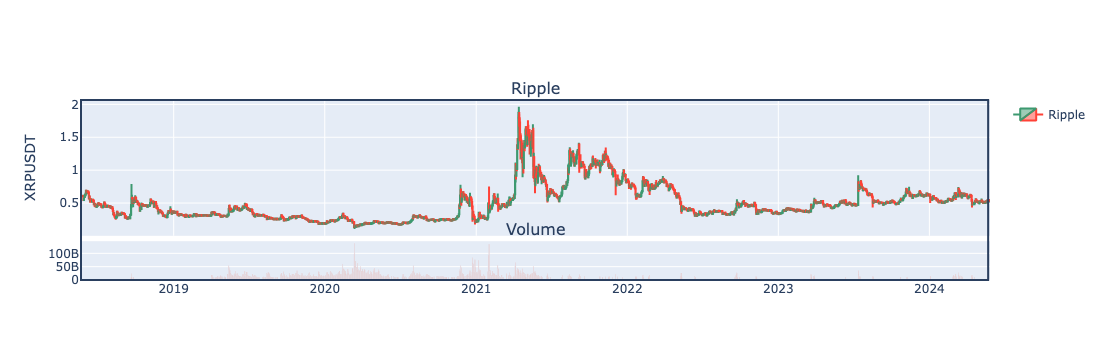

In [46]:
# Create a subplot figure with 2 rows and 1 column
# shared_xaxes=True means the x-axes will be shared across the subplots
# vertical_spacing sets the space between the subplots
# subplot_titles sets the titles for each subplot
# row_width defines the relative height of each row
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, subplot_titles=('Ripple', 'Volume'), 
                    row_width=[0.2, 0.7])

# Add a candlestick chart to the first subplot (row 1, col 1)
# x specifies the x-axis data (dates)
# open, high, low, and close specify the corresponding candlestick data
# name sets the trace name for the legend
fig.add_trace(go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"],
                             low=df["Low"], close=df["Close"], name="Ripple"), 
              row=1, col=1)

# Update the layout of the figure
# yaxis_title sets the title for the y-axis
# shapes adds a vertical line spanning the entire x-axis range
fig.update_layout(
    yaxis_title='XRPUSDT',
    shapes=[dict(
        x0='2018-05-22', x1='2024-05-22', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
)

# Add a bar chart to the second subplot (row 2, col 1)
# x specifies the x-axis data (dates)
# y specifies the y-axis data (volume)
# showlegend=False hides the legend for this trace
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], showlegend=False), row=2, col=1)

# Update the layout of the figure
# xaxis_rangeslider_visible=False hides the range slider
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update(layout_xaxis_rangeslider_visible=False)

# Display the figure
fig.show()


What Is SMA?
An SMA (Simple Moving Average) calculates the average closing price of a security over a set number of days. For example, a 17-day SMA adds the closing prices of the last 17 days and divides the total by 17.

Importance of SMA in Finance
Technical Analysis Tool: Used to identify trends and potential reversal points.
Price Smoothing: Helps traders and investors understand the overall direction of an asset’s price movement.
Trend Assessment: By plotting SMAs, traders can determine if an asset is in an uptrend, downtrend, or ranging phase.
Key Insights
Trend Identification: Price above the SMA suggests an uptrend; below indicates a downtrend.
Support and Resistance: SMAs act as dynamic support or resistance levels.
Crossovers: Intersections of different SMAs (e.g., 50-day and 200-day) signal potential trend changes.
Golden Cross and Death Cross: Bullish signal (golden cross) when a shorter-term SMA crosses above a longer-term SMA; bearish signal (death cross) when the opposite occurs.
Application
Trading Decisions: Used to decide when to buy, sell, or hold assets.
Investment Assessment: Evaluates the overall health of a stock or market index.
Combined Analysis: Often used with other technical indicators for more robust analysis.

In [48]:
# Calculate the 5-day Simple Moving Average (SMA) for the 'Close' prices
# rolling(5) creates a rolling window of size 5
# mean() calculates the mean for each window
# The result is assigned to a new column '5d_sma' in the DataFrame
df["5d_sma"] = df["Close"].rolling(5).mean()

# Calculate the 9-day Simple Moving Average (SMA) for the 'Close' prices
# rolling(9) creates a rolling window of size 9
# mean() calculates the mean for each window
# The result is assigned to a new column '9d_sma' in the DataFrame
df["9d_sma"] = df["Close"].rolling(9).mean()

# Calculate the 17-day Simple Moving Average (SMA) for the 'Close' prices
# rolling(17) creates a rolling window of size 17
# mean() calculates the mean for each window
# The result is assigned to a new column '17d_sma' in the DataFrame
df["17d_sma"] = df["Close"].rolling(17).mean()


In [50]:
# Display the first 17 rows of the DataFrame with custom styling
# head(17) selects the first 17 rows of the DataFrame
# style.set_properties() is used to customize the appearance of the DataFrame
# **{'background-color': '#b5caff', 'color': 'black', 'border-color': 'black'} sets the styles for the DataFrame
df.head(17).style.set_properties(**{
    'background-color': '#b5caff',  # Sets the background color of the cells to light blue
    'color': 'black',  # Sets the text color to black
    'border-color': 'black'  # Sets the border color of the cells to black
})


,Date,Close,Open,High,Low,Volume,5d_sma,9d_sma,17d_sma
0,2018-05-26 00:00:00,0.608800,0.605600,0.624700,0.598900,99110000.000000,nan,nan,nan
1,2018-05-27 00:00:00,0.604600,0.608800,0.611900,0.598800,95150000.000000,nan,nan,nan
2,2018-05-28 00:00:00,0.547600,0.604700,0.607500,0.546000,158340000.000000,nan,nan,nan
3,2018-05-29 00:00:00,0.599400,0.547600,0.608800,0.544400,155950000.000000,nan,nan,nan
4,2018-05-30 00:00:00,0.593800,0.599400,0.625500,0.578600,132830000.000000,0.590840,nan,nan
5,2018-05-31 00:00:00,0.611000,0.594100,0.621000,0.586600,123380000.000000,0.591280,nan,nan
6,2018-06-01 00:00:00,0.621100,0.611000,0.623600,0.601900,132400000.000000,0.594580,nan,nan
7,2018-06-02 00:00:00,0.642900,0.621100,0.650600,0.615500,145530000.000000,0.613640,nan,nan
8,2018-06-03 00:00:00,0.688000,0.642900,0.688000,0.639300,127980000.000000,0.631360,0.613022,nan
9,2018-06-04 00:00:00,0.656000,0.688000,0.704300,0.635800,194540000.000000,0.643800,0.618267,nan


In [52]:
# Fill NaN values in the '5d_sma' column with the corresponding values from the 'Close' column
# This ensures that any missing values in the '5d_sma' column (which occur at the start of the dataset) are replaced with actual closing prices
df['5d_sma'] = df['5d_sma'].fillna(df['Close'])

# Fill NaN values in the '9d_sma' column with the corresponding values from the 'Close' column
# This ensures that any missing values in the '9d_sma' column (which occur at the start of the dataset) are replaced with actual closing prices
df['9d_sma'] = df['9d_sma'].fillna(df['Close'])

# Fill NaN values in the '17d_sma' column with the corresponding values from the 'Close' column
# This ensures that any missing values in the '17d_sma' column (which occur at the start of the dataset) are replaced with actual closing prices
df['17d_sma'] = df['17d_sma'].fillna(df['Close'])


In [54]:
df.head(17).style.set_properties(**{'background-color': '#b5caff',
                           'color': 'black',
                           'border-color': 'black'})

,Date,Close,Open,High,Low,Volume,5d_sma,9d_sma,17d_sma
0,2018-05-26 00:00:00,0.608800,0.605600,0.624700,0.598900,99110000.000000,0.608800,0.608800,0.608800
1,2018-05-27 00:00:00,0.604600,0.608800,0.611900,0.598800,95150000.000000,0.604600,0.604600,0.604600
2,2018-05-28 00:00:00,0.547600,0.604700,0.607500,0.546000,158340000.000000,0.547600,0.547600,0.547600
3,2018-05-29 00:00:00,0.599400,0.547600,0.608800,0.544400,155950000.000000,0.599400,0.599400,0.599400
4,2018-05-30 00:00:00,0.593800,0.599400,0.625500,0.578600,132830000.000000,0.590840,0.593800,0.593800
5,2018-05-31 00:00:00,0.611000,0.594100,0.621000,0.586600,123380000.000000,0.591280,0.611000,0.611000
6,2018-06-01 00:00:00,0.621100,0.611000,0.623600,0.601900,132400000.000000,0.594580,0.621100,0.621100
7,2018-06-02 00:00:00,0.642900,0.621100,0.650600,0.615500,145530000.000000,0.613640,0.642900,0.642900
8,2018-06-03 00:00:00,0.688000,0.642900,0.688000,0.639300,127980000.000000,0.631360,0.613022,0.688000
9,2018-06-04 00:00:00,0.656000,0.688000,0.704300,0.635800,194540000.000000,0.643800,0.618267,0.656000


SMA vs Real Price


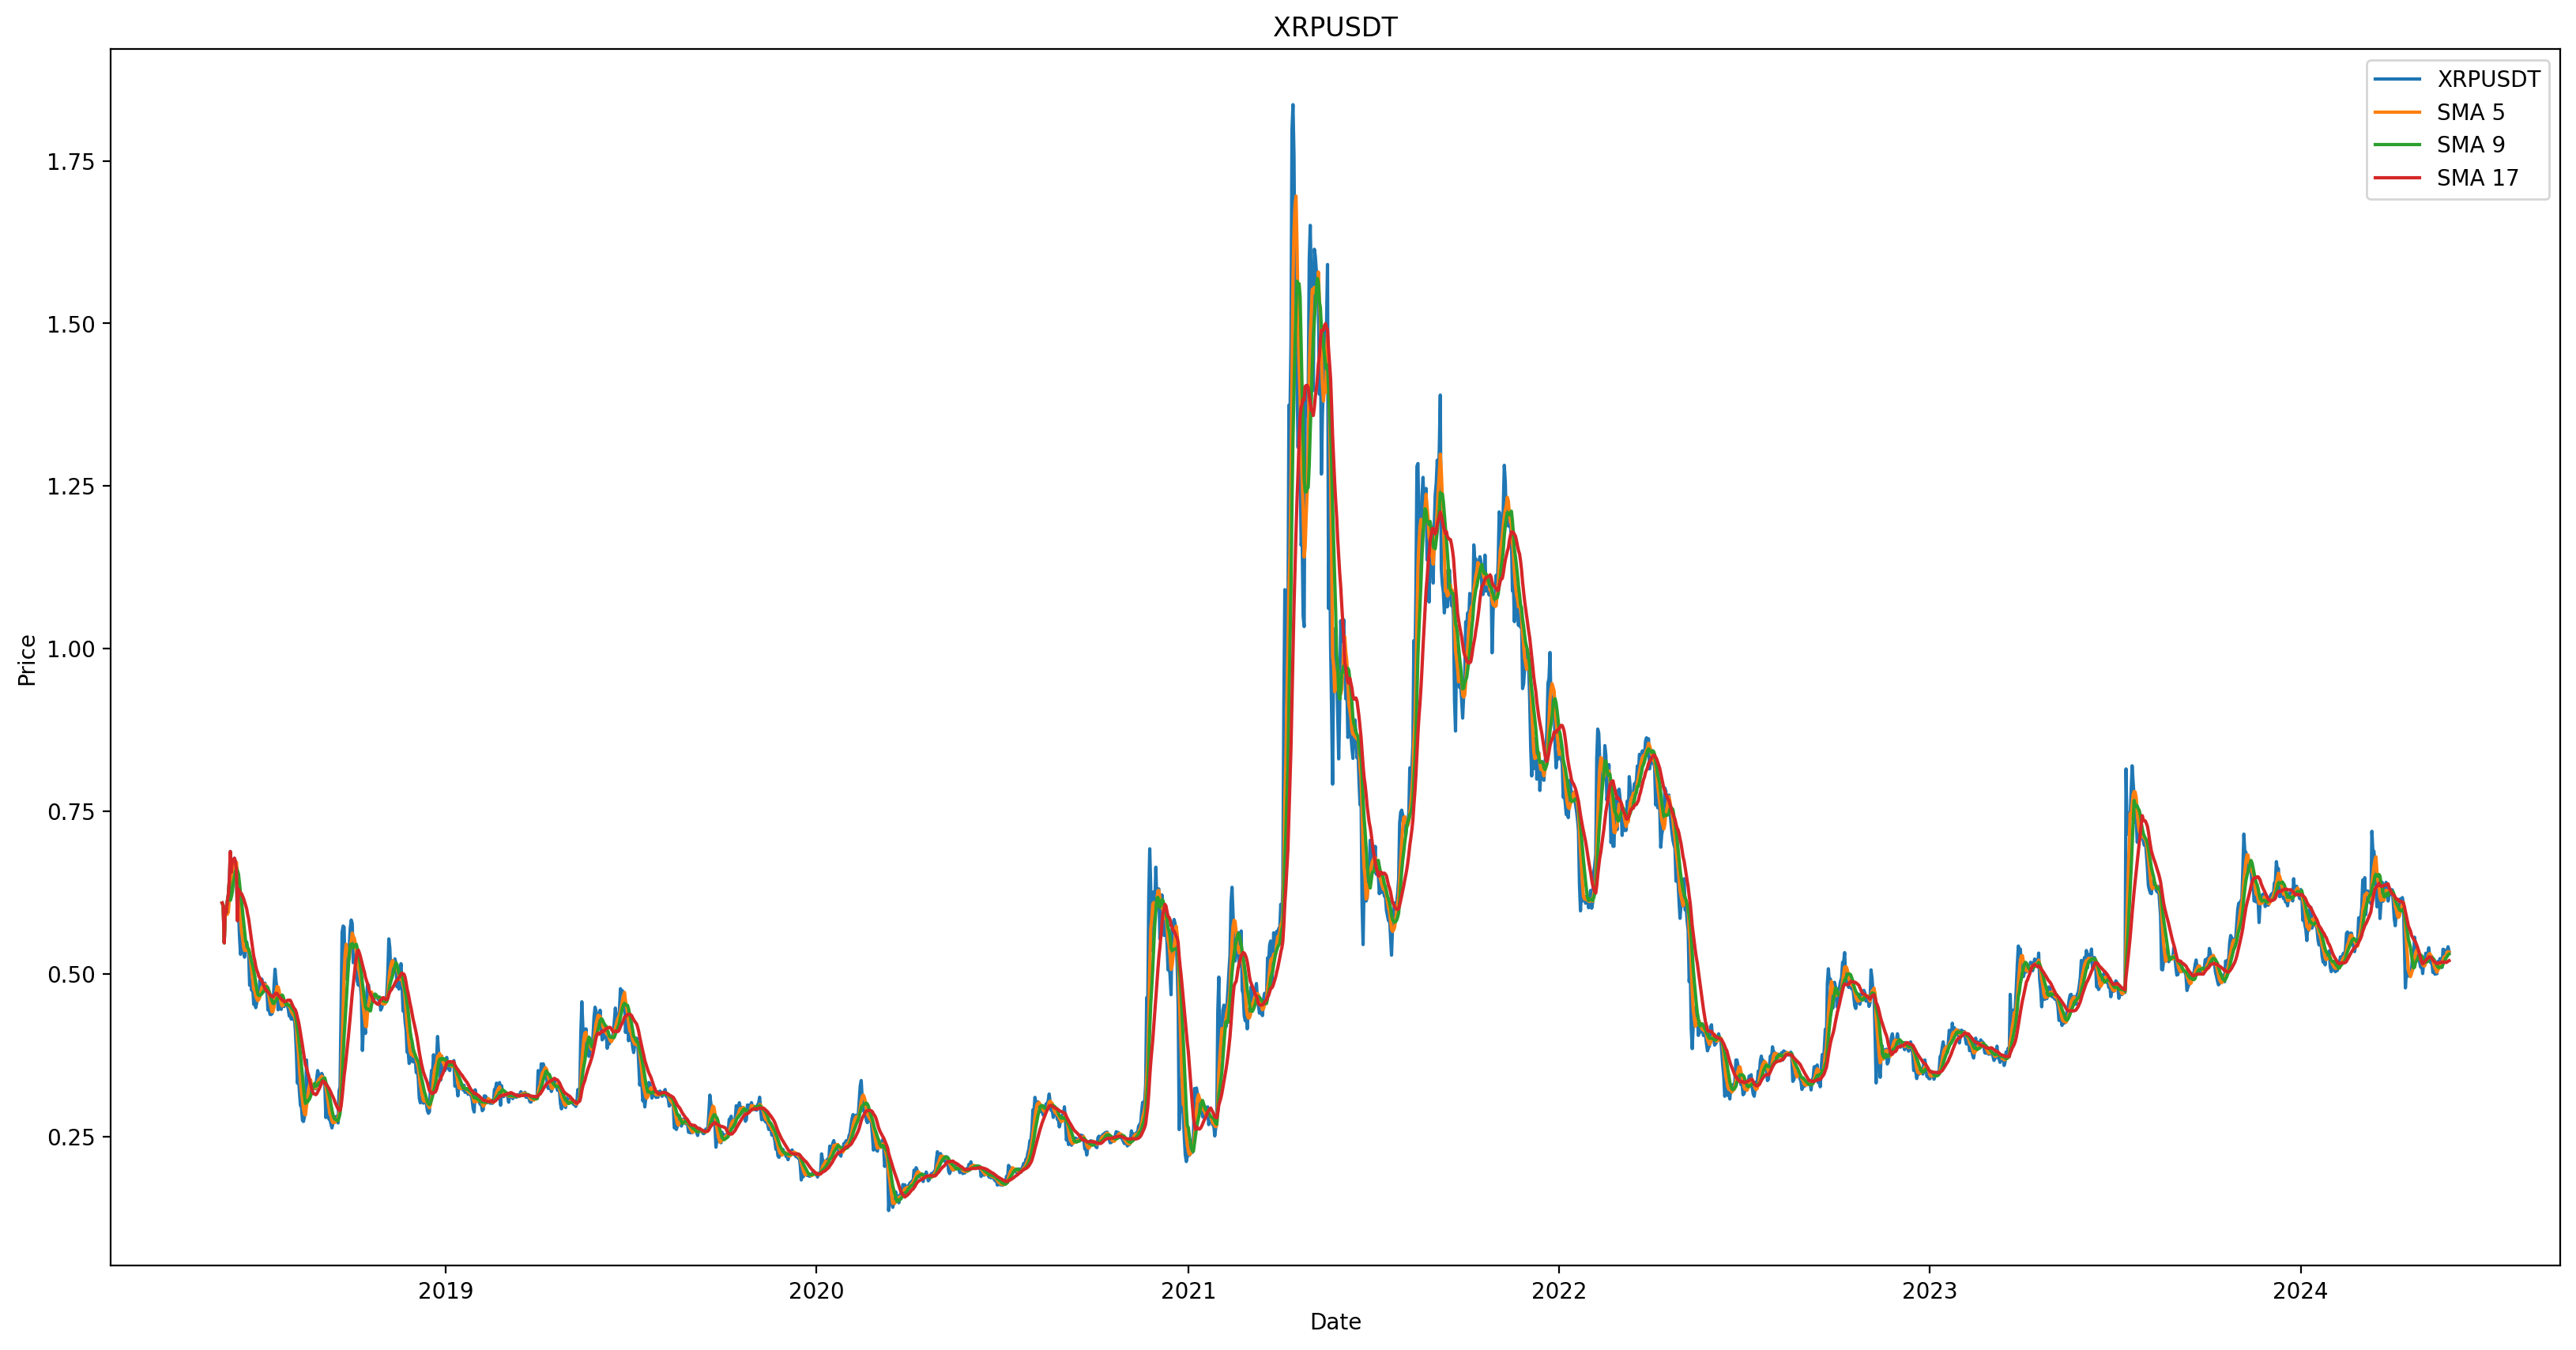

In [57]:
plt.figure(figsize=(20,10), dpi=200)
plt.plot(df['Date'], df['Close'], label='XRPUSDT')
plt.plot(df['Date'], df['5d_sma'], label='SMA 5')
plt.plot(df['Date'], df['9d_sma'], label='SMA 9')
plt.plot(df['Date'], df['17d_sma'], label='SMA 17')
plt.title('XRPUSDT')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.show()

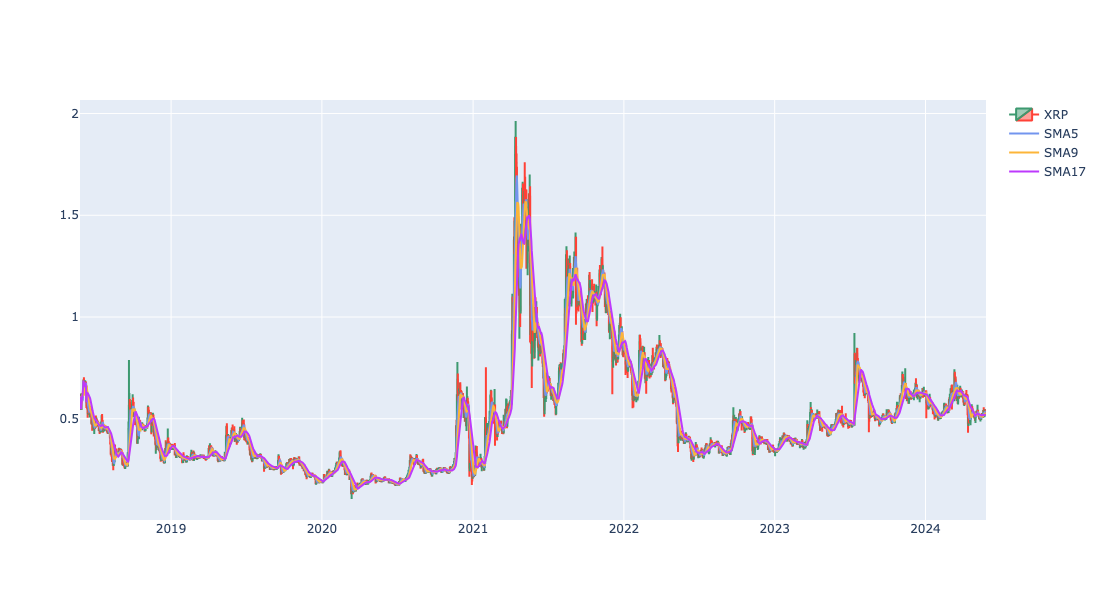

In [59]:
# Create a candlestick chart
fig = go.Figure(data=go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"],
                                    low=df["Low"], close=df["Close"], name="XRP"))

# Hide the x-axis range slider
fig.update_layout(xaxis_rangeslider_visible=False)

# Add 5-day SMA line
fig.add_trace(go.Scatter(x=df['Date'], y=df['5d_sma'], line_color='#7295ee', name="SMA5", mode='lines'))

# Add 9-day SMA line
fig.add_trace(go.Scatter(x=df['Date'], y=df['9d_sma'], line_color='#fcb539', name="SMA9", mode='lines'))

# Add 17-day SMA line
fig.add_trace(go.Scatter(x=df['Date'], y=df['17d_sma'], line_color='#bd39fc', name="SMA17", mode='lines'))

# Set figure size
fig.update_layout(autosize=False, width=1200, height=600)

# Show the figure
fig.show()


Definition and Construction:

Bollinger Bands consist of three lines on stock charts:

The center line: Represents the 20-day Simple Moving Average (SMA) of the stock’s closing prices.

The upper band: Set at two standard deviations above the center line.

The lower band: Set at two standard deviations below the center line.

As price volatility changes, the bands widen or narrow accordingly.

Relative Highs and Lows:

Bollinger Bands provide a relative definition of high and low prices:

Prices are considered high near the upper band.

Prices are considered low near the lower band.

This aids in pattern recognition and helps compare price action with other indicators for systematic trading decisions.

Key Insights:

Overbought and Oversold Signals:

When a stock’s price approaches the upper band, it may be overbought, signaling a potential reversal or correction.

Conversely, when the price nears the lower band, it may be oversold, suggesting a buying opportunity.

Trend Confirmation:

Bollinger Bands can confirm trends:

Uptrend: Price consistently stays above the center line.

Downtrend: Price remains below the center line.

Volatility Assessment:

Wider bands indicate higher volatility, while narrower bands suggest stability.

Traders use this information to adjust their strategies.

John Bollinger:

John Bollinger, a financial analyst, developed Bollinger Bands in the 1980s.

He combined mathematics, engineering, and market analysis to create this powerful tool.

Bollinger Bands have become a staple in technical analysis, aiding traders and investors in making informed decisions.

In summary, Bollinger Bands help traders assess market conditions, manage risk, and identify potential trading opportunities.

In [63]:
# Define parameters for Bollinger Bands
window_size = 15
num_std = 4

# Calculate rolling mean and standard deviation for 5-day SMA
rolling_mean_5 = np.convolve(df['5d_sma'], np.ones(window_size) / window_size, mode='valid')
rolling_std_5 = np.std([df['5d_sma'][i:i + window_size] for i in range(len(df['5d_sma']) - window_size + 1)], axis=1)

# Calculate Bollinger Bands for 5-day SMA
upper_band_5 = rolling_mean_5 + num_std * rolling_std_5
lower_band_5 = rolling_mean_5 - num_std * rolling_std_5

# Calculate rolling mean and standard deviation for 9-day SMA
rolling_mean_9 = np.convolve(df['9d_sma'], np.ones(window_size) / window_size, mode='valid')
rolling_std_9 = np.std([df['9d_sma'][i:i + window_size] for i in range(len(df['9d_sma']) - window_size + 1)], axis=1)

# Calculate Bollinger Bands for 9-day SMA
upper_band_9 = rolling_mean_9 + num_std * rolling_std_9
lower_band_9 = rolling_mean_9 - num_std * rolling_std_9

# Calculate rolling mean and standard deviation for 17-day SMA
rolling_mean_17 = np.convolve(df['17d_sma'], np.ones(window_size) / window_size, mode='valid')
rolling_std_17 = np.std([df['17d_sma'][i:i + window_size] for i in range(len(df['17d_sma']) - window_size + 1)], axis=1)

# Calculate Bollinger Bands for 17-day SMA
upper_band_17 = rolling_mean_17 + num_std * rolling_std_17
lower_band_17 = rolling_mean_17 - num_std * rolling_std_17


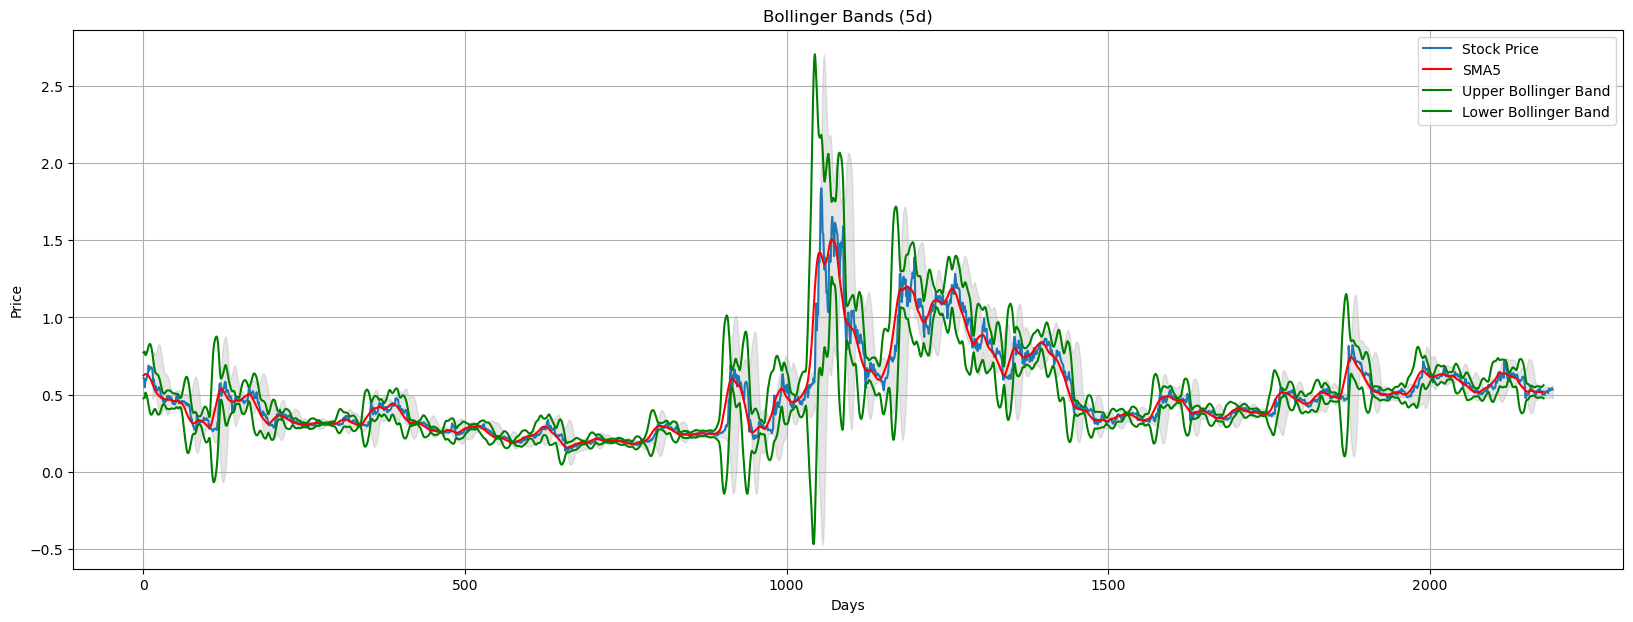

In [65]:
# Plotting 5d
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_5, label='SMA5', color='red')
plt.plot(upper_band_5, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_5, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['5d_sma'])), lower_band_5, upper_band_5, color='grey', alpha=0.2)
plt.title('Bollinger Bands (5d)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

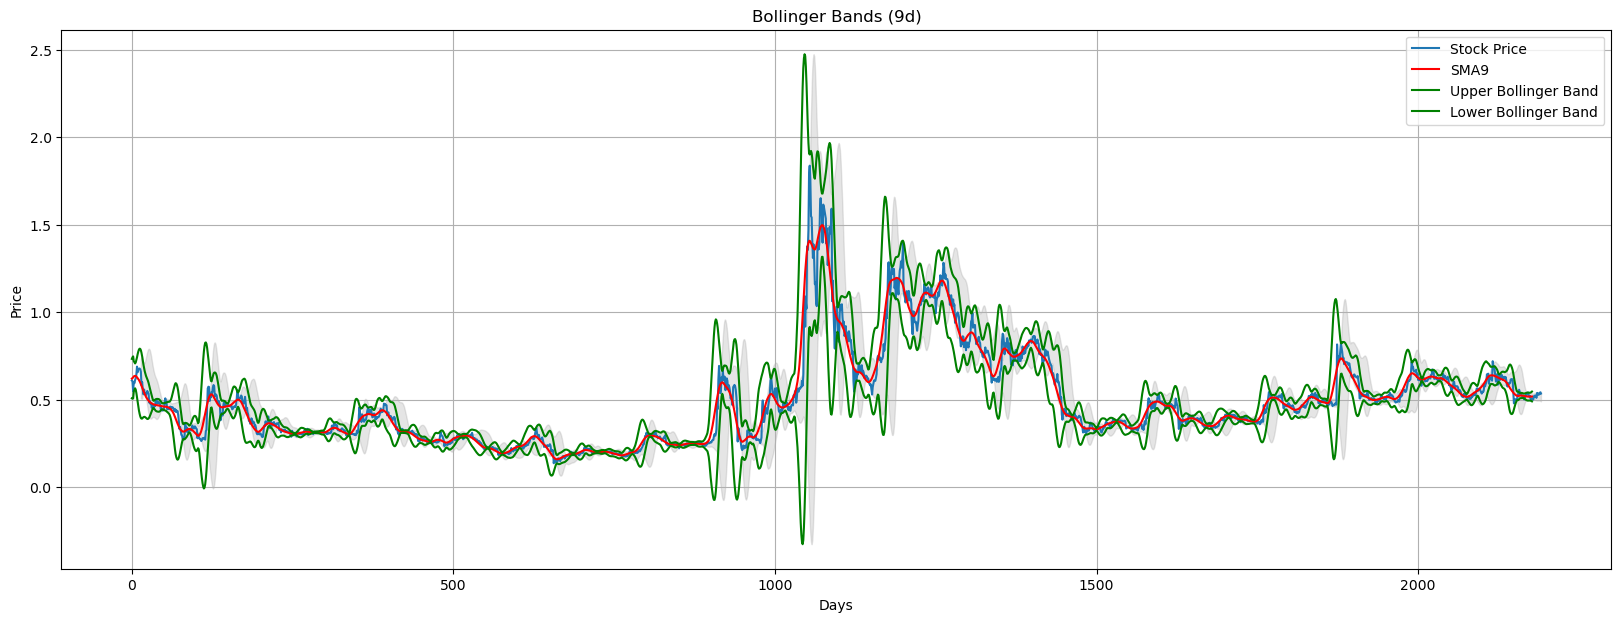

In [67]:
# Plotting 9d
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_9, label='SMA9', color='red')
plt.plot(upper_band_9, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_9, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['9d_sma'])), lower_band_9, upper_band_9,
                 color='grey', alpha=0.2)
plt.title('Bollinger Bands (9d)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


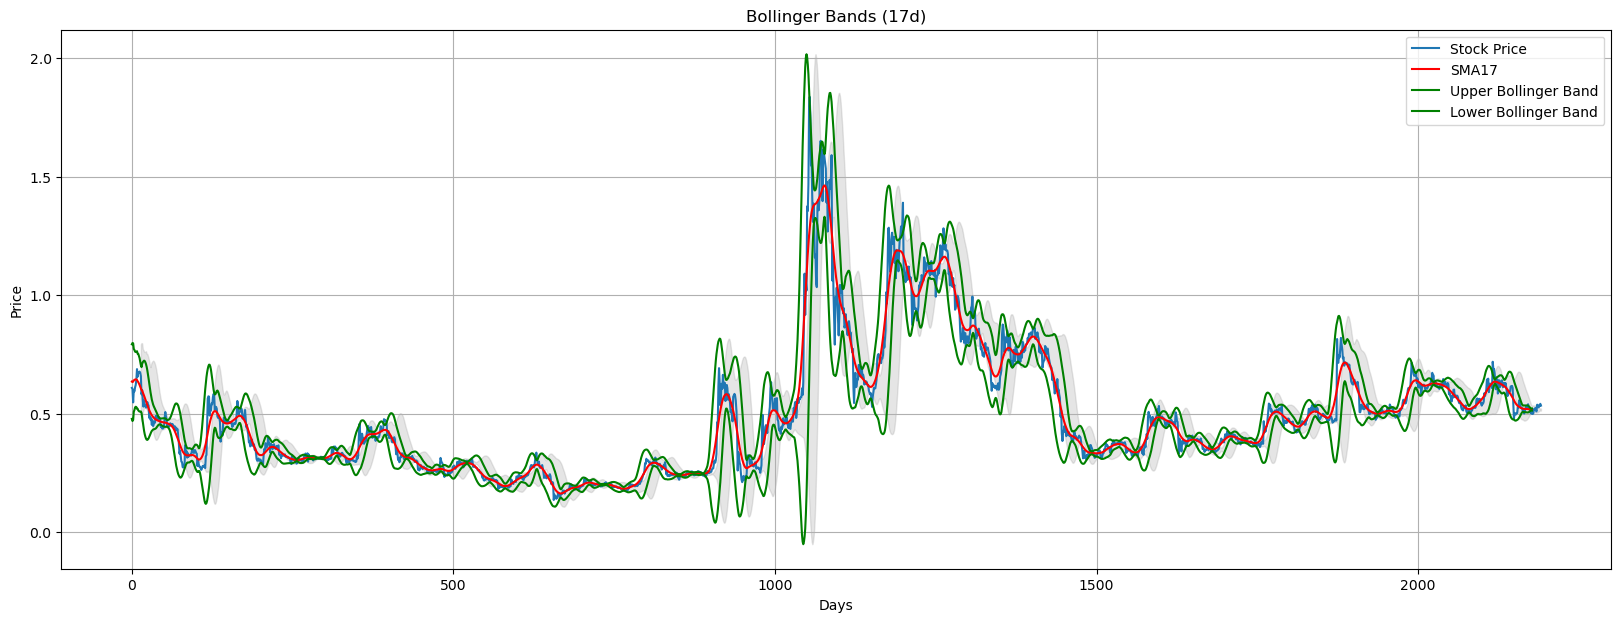

In [69]:
# Plotting
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_17, label='SMA17', color='red')
plt.plot(upper_band_17, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_17, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['17d_sma'])), lower_band_17, upper_band_17,
                 color='grey', alpha=0.2)
plt.title('Bollinger Bands (17d)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Data Preapration


In [72]:
# Create a 'Days' column starting from 1
df['Days'] = df.index + 1


In [74]:
# Create separate DataFrames for 5-day, 9-day, and 17-day SMAs, and a combined DataFrame
_5d = df[['Open', 'High', 'Low', 'Days', '5d_sma', 'Volume', 'Close']].copy(deep=True)
_9d = df[['Open', 'High', 'Low', 'Days', '9d_sma', 'Volume', 'Close']].copy(deep=True)
_17d = df[['Open', 'High', 'Low', 'Days', '17d_sma', 'Volume', 'Close']].copy(deep=True)
_all = df[['Open', 'High', 'Low', 'Days', '5d_sma', '9d_sma', '17d_sma', 'Volume', 'Close']].copy(deep=True)


In [76]:
# Scale features in _5d DataFrame using MinMaxScaler to range (0, 2)
scaler = MinMaxScaler(feature_range=(0,2)).fit(_5d.Low.values.reshape(-1,1))
_5d['Open'] = scaler.transform(_5d.Open.values.reshape(-1,1))
_5d['High'] = scaler.transform(_5d.High.values.reshape(-1,1))
_5d['Low'] = scaler.transform(_5d.Low.values.reshape(-1,1))
_5d['Close'] = scaler.transform(_5d.Close.values.reshape(-1,1))
_5d['Volume'] = scaler.transform(_5d.Volume.values.reshape(-1,1))
_5d['Days'] = scaler.transform(_5d.Days.values.reshape(-1,1))
_5d['5d_sma'] = scaler.transform(_5d['5d_sma'].values.reshape(-1,1))

# Scale features in _9d DataFrame using MinMaxScaler to range (0, 2)
scaler = MinMaxScaler(feature_range=(0,2)).fit(_9d.Low.values.reshape(-1,1))
_9d['Open'] = scaler.transform(_9d.Open.values.reshape(-1,1))
_9d['High'] = scaler.transform(_9d.High.values.reshape(-1,1))
_9d['Low'] = scaler.transform(_9d.Low.values.reshape(-1,1))
_9d['Close'] = scaler.transform(_9d.Close.values.reshape(-1,1))
_9d['Volume'] = scaler.transform(_9d.Volume.values.reshape(-1,1))
_9d['Days'] = scaler.transform(_9d.Days.values.reshape(-1,1))
_9d['9d_sma'] = scaler.transform(_9d['9d_sma'].values.reshape(-1,1))

# Scale features in _17d DataFrame using MinMaxScaler to range (0, 2)
scaler = MinMaxScaler(feature_range=(0,2)).fit(_17d.Low.values.reshape(-1,1))
_17d['Open'] = scaler.transform(_17d.Open.values.reshape(-1,1))
_17d['High'] = scaler.transform(_17d.High.values.reshape(-1,1))
_17d['Low'] = scaler.transform(_17d.Low.values.reshape(-1,1))
_17d['Close'] = scaler.transform(_17d.Close.values.reshape(-1,1))
_17d['Volume'] = scaler.transform(_17d.Volume.values.reshape(-1,1))
_17d['Days'] = scaler.transform(_17d.Days.values.reshape(-1,1))
_17d['17d_sma'] = scaler.transform(_17d['17d_sma'].values.reshape(-1,1))

# Scale features in _all DataFrame using MinMaxScaler to range (0, 2)
scaler = MinMaxScaler(feature_range=(0,2)).fit(_all.Low.values.reshape(-1,1))
_all['Open'] = scaler.transform(_all.Open.values.reshape(-1,1))
_all['High'] = scaler.transform(_all.High.values.reshape(-1,1))
_all['Low'] = scaler.transform(_all.Low.values.reshape(-1,1))
_all['Close'] = scaler.transform(_all.Close.values.reshape(-1,1))
_all['Volume'] = scaler.transform(_all.Volume.values.reshape(-1,1))
_all['Days'] = scaler.transform(_all.Days.values.reshape(-1,1))
_all['5d_sma'] = scaler.transform(_all['5d_sma'].values.reshape(-1,1))
_all['9d_sma'] = scaler.transform(_all['9d_sma'].values.reshape(-1,1))
_all['17d_sma'] = scaler.transform(_all['17d_sma'].values.reshape(-1,1))

# Extract data arrays for further processing
data_5d_all = _5d[['Open', 'High', 'Low', 'Close', '5d_sma', 'Volume', 'Days']].values
data_5d = _5d[['Open', 'High', 'Low', 'Close', '5d_sma']].values
data_9d = _9d[['Open', 'High', 'Low', '9d_sma', 'Close']].values
data_17d = _17d[['Open', 'High', 'Low', '17d_sma', 'Close']].values
data_all = _all[['Open', 'High', 'Low', '5d_sma', '9d_sma', '17d_sma', 'Close']].values


In [78]:
print(data_5d_all.shape)
print(data_5d.shape)
print(data_9d.shape)
print(data_17d.shape)
print(data_all.shape)

(2192, 7)
(2192, 5)
(2192, 5)
(2192, 5)
(2192, 7)


In [80]:
# Set sequence length
seq_len = 11

# Create sequences for data_5d_all
sequences_5d_all = []
for index in range(len(data_5d_all) - seq_len + 1): 
    sequences_5d_all.append(data_5d_all[index: index + seq_len])
sequences_5d_all = np.array(sequences_5d_all)
print(sequences_5d_all.shape)

# Create sequences for data_5d
sequences_5d = []
for index in range(len(data_5d) - seq_len + 1): 
    sequences_5d.append(data_5d[index: index + seq_len])
sequences_5d = np.array(sequences_5d)
print(sequences_5d.shape)

# Create sequences for data_9d
sequences_9d = []
for index in range(len(data_9d) - seq_len + 1): 
    sequences_9d.append(data_9d[index: index + seq_len])
sequences_9d = np.array(sequences_9d)
print(sequences_9d.shape)

# Create sequences for data_17d
sequences_17d = []
for index in range(len(data_17d) - seq_len + 1): 
    sequences_17d.append(data_17d[index: index + seq_len])
sequences_17d = np.array(sequences_17d)
print(sequences_17d.shape)

# Create sequences for data_all
sequences_all = []
for index in range(len(data_all) - seq_len + 1): 
    sequences_all.append(data_all[index: index + seq_len])
sequences_all = np.array(sequences_all)
print(sequences_all.shape)


(2182, 11, 7)
(2182, 11, 5)
(2182, 11, 5)
(2182, 11, 5)
(2182, 11, 7)


Train and Test

In [83]:
# Set validation and test set sizes as percentages
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

# Calculate train, validation, and test set sizes for sequences_5d_all
valid_set_size_5d_all = int(np.round(valid_set_size_percentage / 100 * sequences_5d_all.shape[0]))
test_set_size_5d_all = int(np.round(test_set_size_percentage / 100 * sequences_5d_all.shape[0]))
train_set_size_5d_all = sequences_5d_all.shape[0] - (valid_set_size_5d_all + test_set_size_5d_all)

# Split sequences_5d_all into train, validation, and test sets
x_train_5d_all = sequences_5d_all[:train_set_size_5d_all, :-1, :]
y_train_5d_all = sequences_5d_all[:train_set_size_5d_all, -1, :]
x_valid_5d_all = sequences_5d_all[train_set_size_5d_all:train_set_size_5d_all + valid_set_size_5d_all, :-1, :]
y_valid_5d_all = sequences_5d_all[train_set_size_5d_all:train_set_size_5d_all + valid_set_size_5d_all, -1, :]
x_test_5d_all = sequences_5d_all[train_set_size_5d_all + valid_set_size_5d_all:, :-1, :]
y_test_5d_all = sequences_5d_all[train_set_size_5d_all + valid_set_size_5d_all:, -1, :]

# Calculate train, validation, and test set sizes for sequences_5d
valid_set_size_5d = int(np.round(valid_set_size_percentage / 100 * sequences_5d.shape[0]))
test_set_size_5d = int(np.round(test_set_size_percentage / 100 * sequences_5d.shape[0]))
train_set_size_5d = sequences_5d.shape[0] - (valid_set_size_5d + test_set_size_5d)

# Split sequences_5d into train, validation, and test sets
x_train_5d = sequences_5d[:train_set_size_5d, :-1, :]
y_train_5d = sequences_5d[:train_set_size_5d, -1, :]
x_valid_5d = sequences_5d[train_set_size_5d:train_set_size_5d + valid_set_size_5d, :-1, :]
y_valid_5d = sequences_5d[train_set_size_5d:train_set_size_5d + valid_set_size_5d, -1, :]
x_test_5d = sequences_5d[train_set_size_5d + valid_set_size_5d:, :-1, :]
y_test_5d = sequences_5d[train_set_size_5d + valid_set_size_5d:, -1, :]

# Calculate train, validation, and test set sizes for sequences_9d
valid_set_size_9d = int(np.round(valid_set_size_percentage / 100 * sequences_9d.shape[0]))
test_set_size_9d = int(np.round(test_set_size_percentage / 100 * sequences_9d.shape[0]))
train_set_size_9d = sequences_9d.shape[0] - (valid_set_size_9d + test_set_size_9d)

# Split sequences_9d into train, validation, and test sets
x_train_9d = sequences_9d[:train_set_size_9d, :-1, :]
y_train_9d = sequences_9d[:train_set_size_9d, -1, :]
x_valid_9d = sequences_9d[train_set_size_9d:train_set_size_9d + valid_set_size_9d, :-1, :]
y_valid_9d = sequences_9d[train_set_size_9d:train_set_size_9d + valid_set_size_9d, -1, :]
x_test_9d = sequences_9d[train_set_size_9d + valid_set_size_9d:, :-1, :]
y_test_9d = sequences_9d[train_set_size_9d + valid_set_size_9d:, -1, :]

# Calculate train, validation, and test set sizes for sequences_17d
valid_set_size_17d = int(np.round(valid_set_size_percentage / 100 * sequences_17d.shape[0]))
test_set_size_17d = int(np.round(test_set_size_percentage / 100 * sequences_17d.shape[0]))
train_set_size_17d = sequences_17d.shape[0] - (valid_set_size_17d + test_set_size_17d)

# Split sequences_17d into train, validation, and test sets
x_train_17d = sequences_17d[:train_set_size_17d, :-1, :]
y_train_17d = sequences_17d[:train_set_size_17d, -1, :]
x_valid_17d = sequences_17d[train_set_size_17d:train_set_size_17d + valid_set_size_17d, :-1, :]
y_valid_17d = sequences_17d[train_set_size_17d:train_set_size_17d + valid_set_size_17d, -1, :]
x_test_17d = sequences_17d[train_set_size_17d + valid_set_size_17d:, :-1, :]
y_test_17d = sequences_17d[train_set_size_17d + valid_set_size_17d:, -1, :]

# Calculate train, validation, and test set sizes for sequences_all
valid_set_size_all = int(np.round(valid_set_size_percentage / 100 * sequences_all.shape[0]))
test_set_size_all = int(np.round(test_set_size_percentage / 100 * sequences_all.shape[0]))
train_set_size_all = sequences_5d.shape[0] - (valid_set_size_all + test_set_size_all)

# Split sequences_all into train, validation, and test sets
x_train_all = sequences_all[:train_set_size_all, :-1, :]
y_train_all = sequences_all[:train_set_size_all, -1, :]
x_valid_all = sequences_all[train_set_size_all:train_set_size_all + valid_set_size_all, :-1, :]
y_valid_all = sequences_all[train_set_size_all:train_set_size_all + valid_set_size_all, -1, :]
x_test_all = sequences_all[train_set_size_all + valid_set_size_all:, :-1, :]
y_test_all = sequences_all[train_set_size_all + valid_set_size_all:, -1, :]


Torch Tensor

In [86]:
# Convert train and validation sets to PyTorch tensors for 5d_all
x_train_5d_all = torch.tensor(x_train_5d_all).float()
y_train_5d_all = torch.tensor(y_train_5d_all).float()
x_valid_5d_all = torch.tensor(x_valid_5d_all).float()
y_valid_5d_all = torch.tensor(y_valid_5d_all).float()

# Create DataLoader for training and validation sets for 5d_all
train_dataset_5d_all = TensorDataset(x_train_5d_all, y_train_5d_all)
train_dataloader_5d_all = DataLoader(train_dataset_5d_all, batch_size=32, shuffle=False)
valid_dataset_5d_all = TensorDataset(x_valid_5d_all, y_valid_5d_all)
valid_dataloader_5d_all = DataLoader(valid_dataset_5d_all, batch_size=32, shuffle=False)

# Convert train and validation sets to PyTorch tensors for 5d
x_train_5d = torch.tensor(x_train_5d).float()
y_train_5d = torch.tensor(y_train_5d).float()
x_valid_5d = torch.tensor(x_valid_5d).float()
y_valid_5d = torch.tensor(y_valid_5d).float()

# Create DataLoader for training and validation sets for 5d
train_dataset_5d = TensorDataset(x_train_5d, y_train_5d)
train_dataloader_5d = DataLoader(train_dataset_5d, batch_size=32, shuffle=False)
valid_dataset_5d = TensorDataset(x_valid_5d, y_valid_5d)
valid_dataloader_5d = DataLoader(valid_dataset_5d, batch_size=32, shuffle=False)

# Convert train and validation sets to PyTorch tensors for 9d
x_train_9d = torch.tensor(x_train_9d).float()
y_train_9d = torch.tensor(y_train_9d).float()
x_valid_9d = torch.tensor(x_valid_9d).float()
y_valid_9d = torch.tensor(y_valid_9d).float()

# Create DataLoader for training and validation sets for 9d
train_dataset_9d = TensorDataset(x_train_9d, y_train_9d)
train_dataloader_9d = DataLoader(train_dataset_9d, batch_size=32, shuffle=False)
valid_dataset_9d = TensorDataset(x_valid_9d, y_valid_9d)
valid_dataloader_9d = DataLoader(valid_dataset_9d, batch_size=32, shuffle=False)

# Convert train and validation sets to PyTorch tensors for 17d
x_train_17d = torch.tensor(x_train_17d).float()
y_train_17d = torch.tensor(y_train_17d).float()
x_valid_17d = torch.tensor(x_valid_17d).float()
y_valid_17d = torch.tensor(y_valid_17d).float()

# Create DataLoader for training and validation sets for 17d
train_dataset_17d = TensorDataset(x_train_17d, y_train_17d)
train_dataloader_17d = DataLoader(train_dataset_17d, batch_size=32, shuffle=False)
valid_dataset_17d = TensorDataset(x_valid_17d, y_valid_17d)
valid_dataloader_17d = DataLoader(valid_dataset_17d, batch_size=32, shuffle=False)

# Convert train and validation sets to PyTorch tensors for all
x_train_all = torch.tensor(x_train_all).float()
y_train_all = torch.tensor(y_train_all).float()
x_valid_all = torch.tensor(x_valid_all).float()
y_valid_all = torch.tensor(y_valid_all).float()

# Create DataLoader for training and validation sets for all
train_dataset_all = TensorDataset(x_train_all, y_train_all)
train_dataloader_all = DataLoader(train_dataset_all, batch_size=32, shuffle=False)
valid_dataset_all = TensorDataset(x_valid_all, y_valid_all)
valid_dataloader_all = DataLoader(valid_dataset_all, batch_size=32, shuffle=False)


In [88]:
import torch
import torch.nn as nn

# Define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature):
        super(NeuralNetwork, self).__init__()
        self.lstm = nn.LSTM(num_feature, 64, batch_first=True)  # LSTM layer
        self.fc = nn.Linear(64, num_feature)  # Fully connected layer

    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)  # LSTM forward pass
        x = self.fc(hidden[-1])  # Fully connected layer on the last hidden state
        return x

# Example usage
num_features = 10  # Adjust based on your dataset
model = NeuralNetwork(num_features)
print(model)


NeuralNetwork(
  (lstm): LSTM(10, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=10, bias=True)
)


In [90]:
# Instantiate the neural network for 5d_all dataset
# The network takes 7 features as input (Open, High, Low, Close, 5d_sma, Volume, Days)
model_5d_all = NeuralNetwork(7)
print(model_5d_all)


NeuralNetwork(
  (lstm): LSTM(7, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=7, bias=True)
)


In [92]:
optimizer = optim.Adam(model_5d_all.parameters())
mse = nn.MSELoss()

In [94]:
def train(dataloader):
    epoch_loss = 0
    model_5d_all.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_5d_all(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

In [96]:
def evaluate(dataloader):
    epoch_loss = 0
    model_5d_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_5d_all(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [98]:
n_epochs = 100  # Number of training epochs
best_valid_loss_5d_all = float('inf')  # Initialize the best validation loss to infinity

# Training loop
for epoch in range(1, n_epochs + 1):
    
    # Train the model and calculate training loss
    train_loss_5d_all = train(train_dataloader_5d_all)
    
    # Evaluate the model and calculate validation loss
    valid_loss_5d_all = evaluate(valid_dataloader_5d_all)
    
    # Save the best model
    if valid_loss_5d_all < best_valid_loss_5d_all:
        best_valid_loss_5d_all = valid_loss_5d_all
        torch.save(model_5d_all.state_dict(), 'saved_weights_5d_all.pt')

    # Print epoch, training loss, and validation loss
    print(f'Epoch {epoch}')
    print(f'\tTrain Loss: {train_loss_5d_all:.5f} | Val Loss: {valid_loss_5d_all:.5f}\n')


Epoch 1
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 2
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 3
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 4
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 5
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 6
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 7
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 8
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 9
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 10
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 11
	Train Loss: 3120662152402417221632.00000 | Val Loss: 4441369353524646400.00000

Epoch 12
	Train Los

In [100]:
# Load the best model weights for 5d_all dataset
# torch.load() loads the saved model weights from the specified file
model_5d_all.load_state_dict(torch.load('saved_weights_5d_all.pt'))
model_5d_all.eval()  # Set the model to evaluation mode


NeuralNetwork(
  (lstm): LSTM(7, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=7, bias=True)
)

In [102]:
# Convert test set to PyTorch tensor
x_test_5d_all = torch.tensor(x_test_5d_all).float()

# Disable gradient calculations for inference
with torch.no_grad():
    y_test_pred_5d_all = model_5d_all(x_test_5d_all)  # Make predictions on the test set

# Convert predictions to NumPy array and select the first output
y_test_pred_5d_all = y_test_pred_5d_all.numpy()


[]

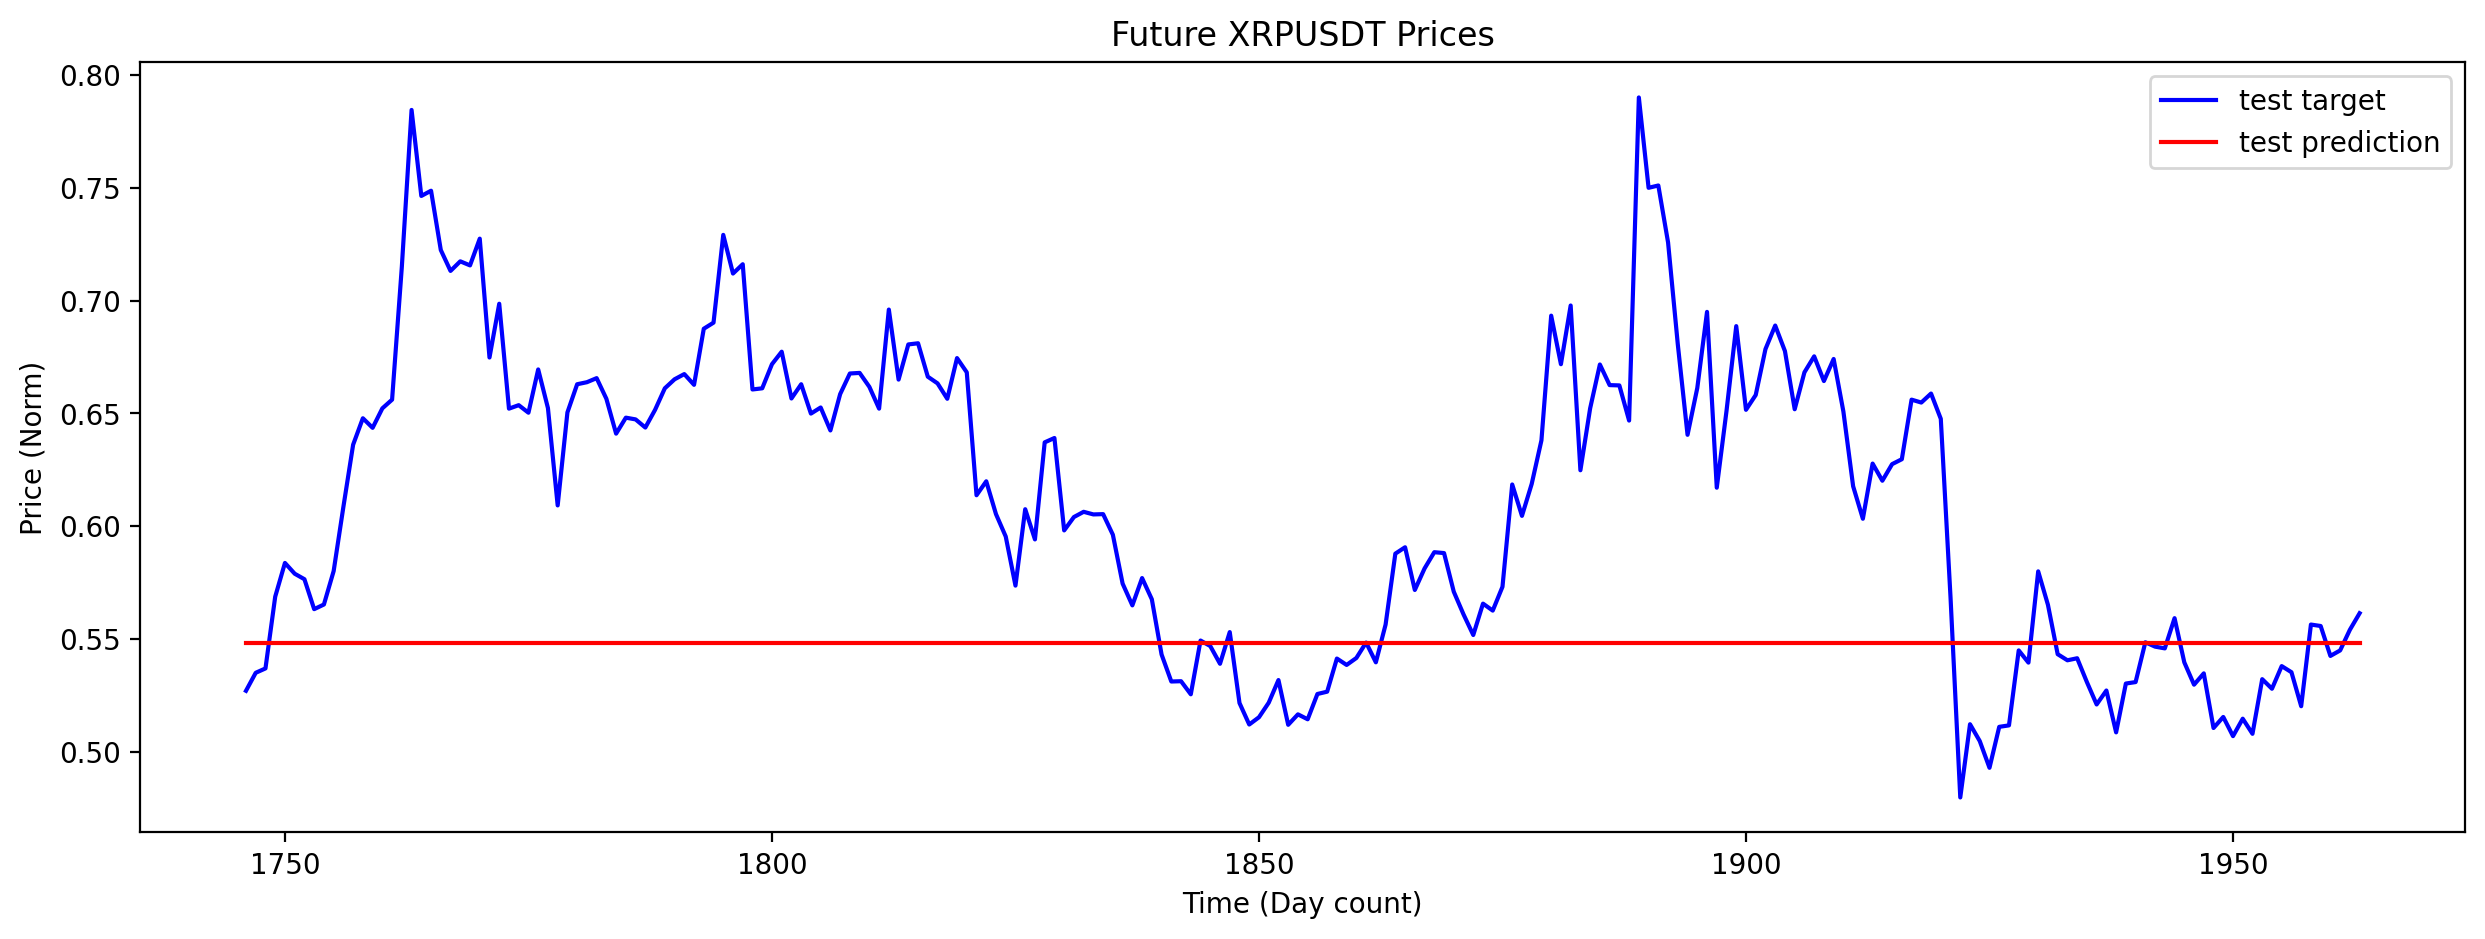

In [106]:
#Define the index of the feature to plot (e.g., the first feature)
idx = 0

# Create a new figure with specified size and resolution
plt.figure(figsize=(15, 5), dpi=200)

# Plot the actual test target prices
plt.plot(np.arange(y_train_5d_all.shape[0], y_train_5d_all.shape[0] + y_test_5d_all.shape[0]),
         y_test_5d_all[:, idx], color='blue', label='test target')

# Plot the predicted test prices
plt.plot(np.arange(y_train_5d_all.shape[0], y_train_5d_all.shape[0] + y_test_pred_5d_all.shape[0]),
         y_test_pred_5d_all[:, idx], color='red', label='test prediction')

# Add title and labels
plt.title('Future XRPUSDT Prices')
plt.xlabel('Time (Day count)')
plt.ylabel('Price (Norm)')

# Add legend
plt.legend(loc='best')

# Show the plot
plt.plot()

In [108]:
model_5d = NeuralNetwork(5)

In [110]:
optimizer = optim.Adam(model_5d.parameters())


In [112]:
def train(dataloader):
    epoch_loss = 0
    model_5d.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_5d(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss


In [114]:
def evaluate(dataloader):
    epoch_loss = 0
    model_5d.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_5d(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [116]:
n_epochs = 100
best_valid_loss_5d = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_5d = train(train_dataloader_5d)
    valid_loss_5d = evaluate(valid_dataloader_5d)
    
    #save the best model
    if valid_loss_5d < best_valid_loss_5d:
        best_valid_loss_5d = valid_loss_5d
        torch.save(model_5d, 'saved_weights_5d.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_5d:.5f} | ' + f'\tVal Loss: {valid_loss_5d:.5f}\n')

	Train Loss: 7.66044 | 	Val Loss: 0.00897

	Train Loss: 5.64167 | 	Val Loss: 0.03590

	Train Loss: 4.32246 | 	Val Loss: 0.03296

	Train Loss: 3.27620 | 	Val Loss: 0.02372

	Train Loss: 2.64593 | 	Val Loss: 0.01610

	Train Loss: 2.44339 | 	Val Loss: 0.01520

	Train Loss: 2.38251 | 	Val Loss: 0.01495

	Train Loss: 2.35805 | 	Val Loss: 0.01503

	Train Loss: 2.33010 | 	Val Loss: 0.01503

	Train Loss: 2.30602 | 	Val Loss: 0.01508

	Train Loss: 2.28332 | 	Val Loss: 0.01511

	Train Loss: 2.26274 | 	Val Loss: 0.01515

	Train Loss: 2.24399 | 	Val Loss: 0.01519

	Train Loss: 2.22670 | 	Val Loss: 0.01523

	Train Loss: 2.21088 | 	Val Loss: 0.01526

	Train Loss: 2.19625 | 	Val Loss: 0.01529

	Train Loss: 2.18270 | 	Val Loss: 0.01532

	Train Loss: 2.17008 | 	Val Loss: 0.01534

	Train Loss: 2.15828 | 	Val Loss: 0.01536

	Train Loss: 2.14717 | 	Val Loss: 0.01537

	Train Loss: 2.13666 | 	Val Loss: 0.01539

	Train Loss: 2.12667 | 	Val Loss: 0.01539

	Train Loss: 2.11711 | 	Val Loss: 0.01539

	Train Loss

In [118]:
model_5d =torch.load('saved_weights_5d.pt')

In [120]:
x_test_5d = torch.tensor(x_test_5d).float()

with torch.no_grad():
    y_test_pred_5d = model_5d(x_test_5d)

y_test_pred_5d = y_test_pred_5d.numpy()[0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

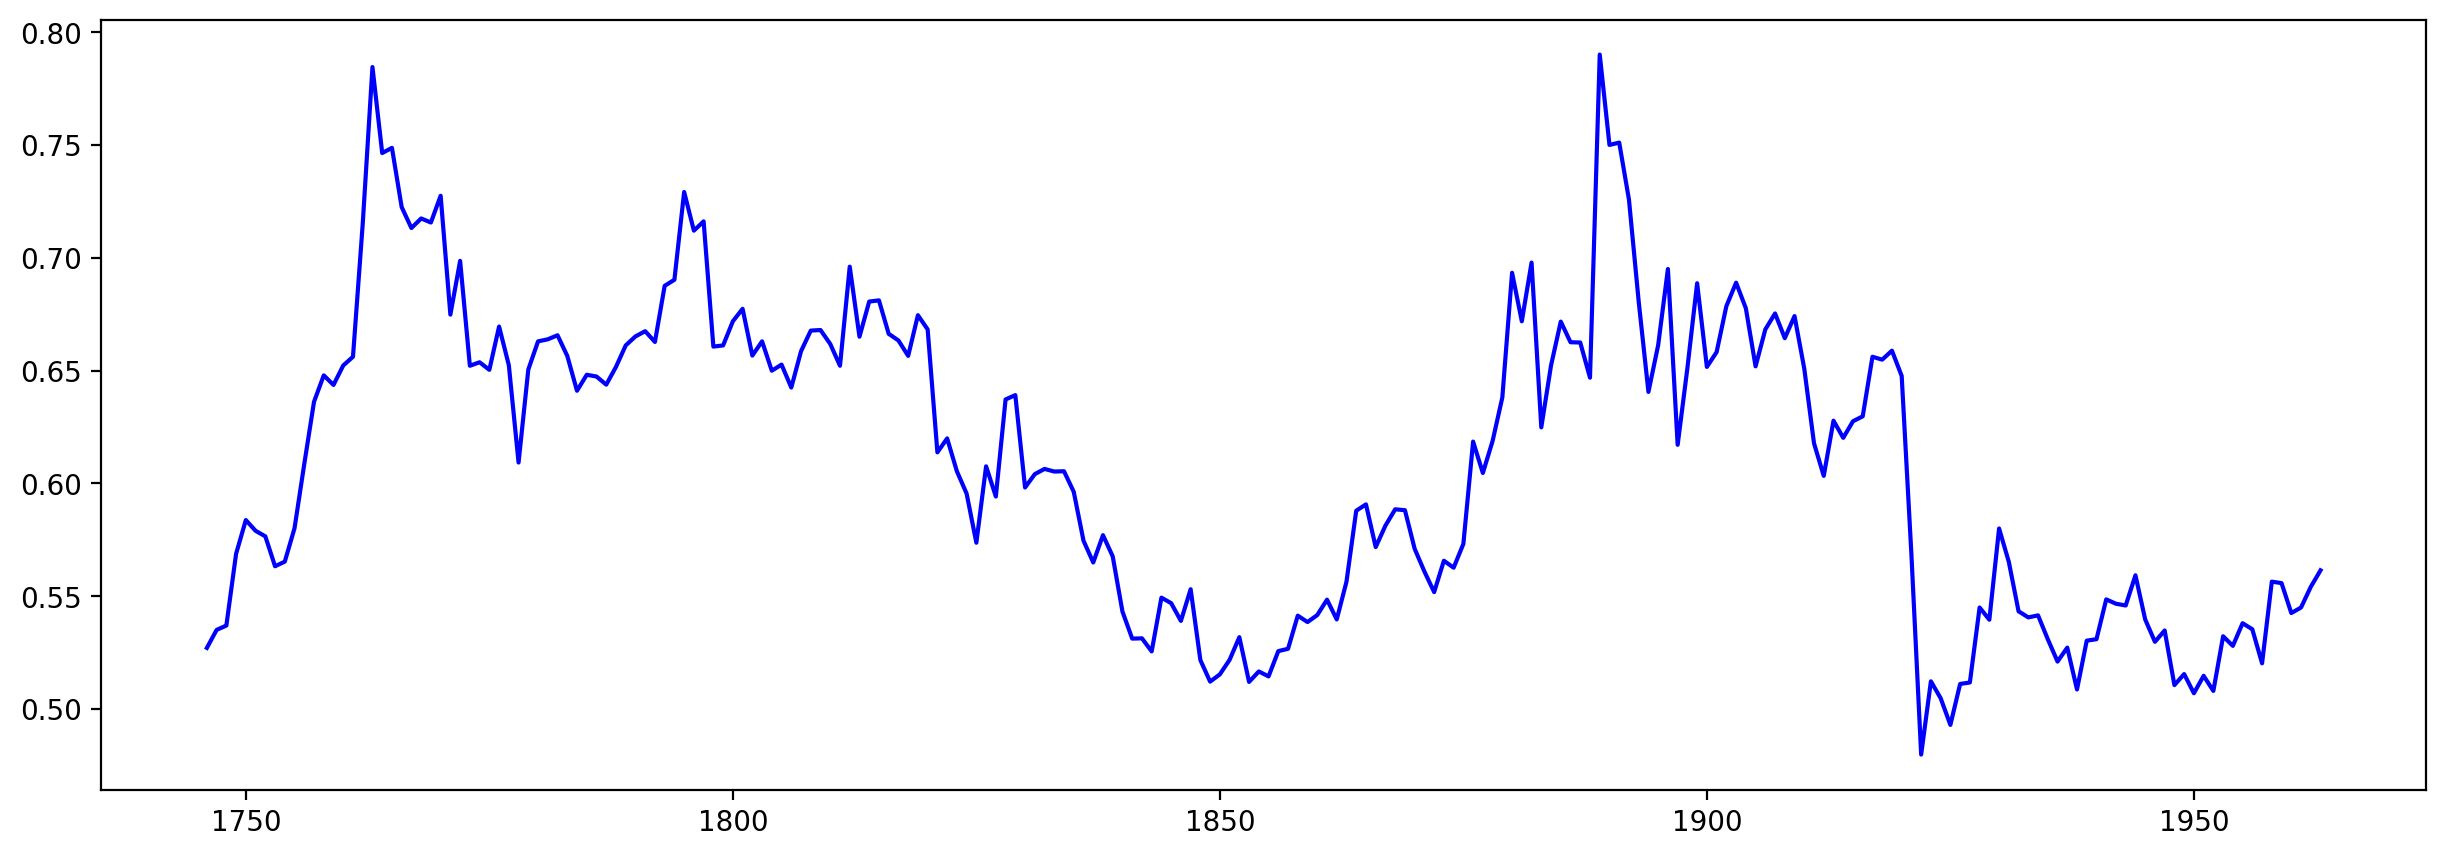

In [122]:
idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_5d.shape[0]),
         y_test_5d[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_pred_5d.shape[0]),
         y_test_pred_5d[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA5)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot();

In [124]:
model_9d = NeuralNetwork(5)

In [126]:
optimizer = optim.Adam(model_9d.parameters())

In [128]:
def train(dataloader):
    epoch_loss = 0
    model_9d.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_9d(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

In [130]:
def evaluate(dataloader):
    epoch_loss = 0
    model_9d.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_9d(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)


In [132]:
n_epochs = 150
best_valid_loss_9d = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_9d = train(train_dataloader_9d)
    valid_loss_9d = evaluate(valid_dataloader_9d)
    
    #save the best model
    if valid_loss_9d < best_valid_loss_9d:
        best_valid_loss_9d = valid_loss_9d
        torch.save(model_9d, 'saved_weights_9d.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_9d:.5f} | ' + f'\tVal Loss: {valid_loss_9d:.5f}\n')


	Train Loss: 6.69559 | 	Val Loss: 0.01316

	Train Loss: 5.74071 | 	Val Loss: 0.02240

	Train Loss: 4.68847 | 	Val Loss: 0.02835

	Train Loss: 3.60692 | 	Val Loss: 0.02228

	Train Loss: 2.89401 | 	Val Loss: 0.01648

	Train Loss: 2.53535 | 	Val Loss: 0.01420

	Train Loss: 2.41272 | 	Val Loss: 0.01369

	Train Loss: 2.37334 | 	Val Loss: 0.01366

	Train Loss: 2.34355 | 	Val Loss: 0.01370

	Train Loss: 2.31167 | 	Val Loss: 0.01373

	Train Loss: 2.28135 | 	Val Loss: 0.01375

	Train Loss: 2.25431 | 	Val Loss: 0.01378

	Train Loss: 2.23032 | 	Val Loss: 0.01381

	Train Loss: 2.20890 | 	Val Loss: 0.01384

	Train Loss: 2.18971 | 	Val Loss: 0.01386

	Train Loss: 2.17248 | 	Val Loss: 0.01389

	Train Loss: 2.15692 | 	Val Loss: 0.01391

	Train Loss: 2.14279 | 	Val Loss: 0.01393

	Train Loss: 2.12988 | 	Val Loss: 0.01395

	Train Loss: 2.11802 | 	Val Loss: 0.01397

	Train Loss: 2.10705 | 	Val Loss: 0.01399

	Train Loss: 2.09684 | 	Val Loss: 0.01400

	Train Loss: 2.08729 | 	Val Loss: 0.01401

	Train Loss

In [ ]:
model_9d =torch.load('saved_weights_9d.pt')


In [ ]:
x_test_9d = torch.tensor(x_test_9d).float()

with torch.no_grad():
    y_test_pred_9d = model_9d(x_test_9d)

y_test_pred_9d = y_test_pred_9d.numpy()[0]


In [ ]:
idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0]+y_test_9d.shape[0]),
         y_test_9d[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0]+y_test_pred_9d.shape[0]),
         y_test_pred_9d[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA9)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot();


Model Number4: SMA-17d

In [ ]:
model_17d = NeuralNetwork(5)

In [ ]:
optimizer = optim.Adam(model_17d.parameters())

In [ ]:
def train(dataloader):
    epoch_loss = 0
    model_17d.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_17d(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

In [ ]:
def evaluate(dataloader):
    epoch_loss = 0
    model_17d.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_17d(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)


In [ ]:
n_epochs = 150
best_valid_loss_17d = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_17d = train(train_dataloader_17d)
    valid_loss_17d = evaluate(valid_dataloader_17d)
    
    #save the best model
    if valid_loss_17d < best_valid_loss_17d:
        best_valid_loss_17d = valid_loss_17d
        torch.save(model_17d, 'saved_weights_17d.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_17d:.5f} | ' + f'\tVal Loss: {valid_loss_17d:.5f}\n')


In [ ]:
model_17d =torch.load('saved_weights_17d.pt')

In [ ]:
x_test_17d = torch.tensor(x_test_17d).float()

with torch.no_grad():
    y_test_pred_17d = model_17d(x_test_17d)

y_test_pred_17d = y_test_pred_17d.numpy()[0]

In [ ]:
idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_17d.shape[0], y_train_17d.shape[0]+y_test_17d.shape[0]),
         y_test_17d[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_17d.shape[0], y_train_17d.shape[0]+y_test_pred_17d.shape[0]),
         y_test_pred_17d[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA17)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot();


Model Number5: SMA-5d, 9d, 17d

In [ ]:
model_all = NeuralNetwork(7)


In [ ]:
optimizer = optim.Adam(model_all.parameters())

In [ ]:
def train(dataloader):
    epoch_loss = 0
    model_all.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_all(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

In [ ]:
def evaluate(dataloader):
    epoch_loss = 0
    model_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_all(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [ ]:
n_epochs = 150
best_valid_loss_all = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_all = train(train_dataloader_all)
    valid_loss_all = evaluate(valid_dataloader_all)
    
    #save the best model
    if valid_loss_all < best_valid_loss_all:
        best_valid_loss_all = valid_loss_all
        torch.save(model_all, 'saved_weights_all.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_all:.5f} | ' + f'\tVal Loss: {valid_loss_all:.5f}\n')


In [ ]:
model_all =torch.load('saved_weights_all.pt')

In [144]:
x_test_all = torch.tensor(x_test_all).float()

with torch.no_grad():
    y_test_pred_all = model_all(x_test_all)

y_test_pred_all = y_test_pred_all.numpy()[0]

NameError: name 'model_all' is not defined

NameError: name 'y_test_pred_all' is not defined

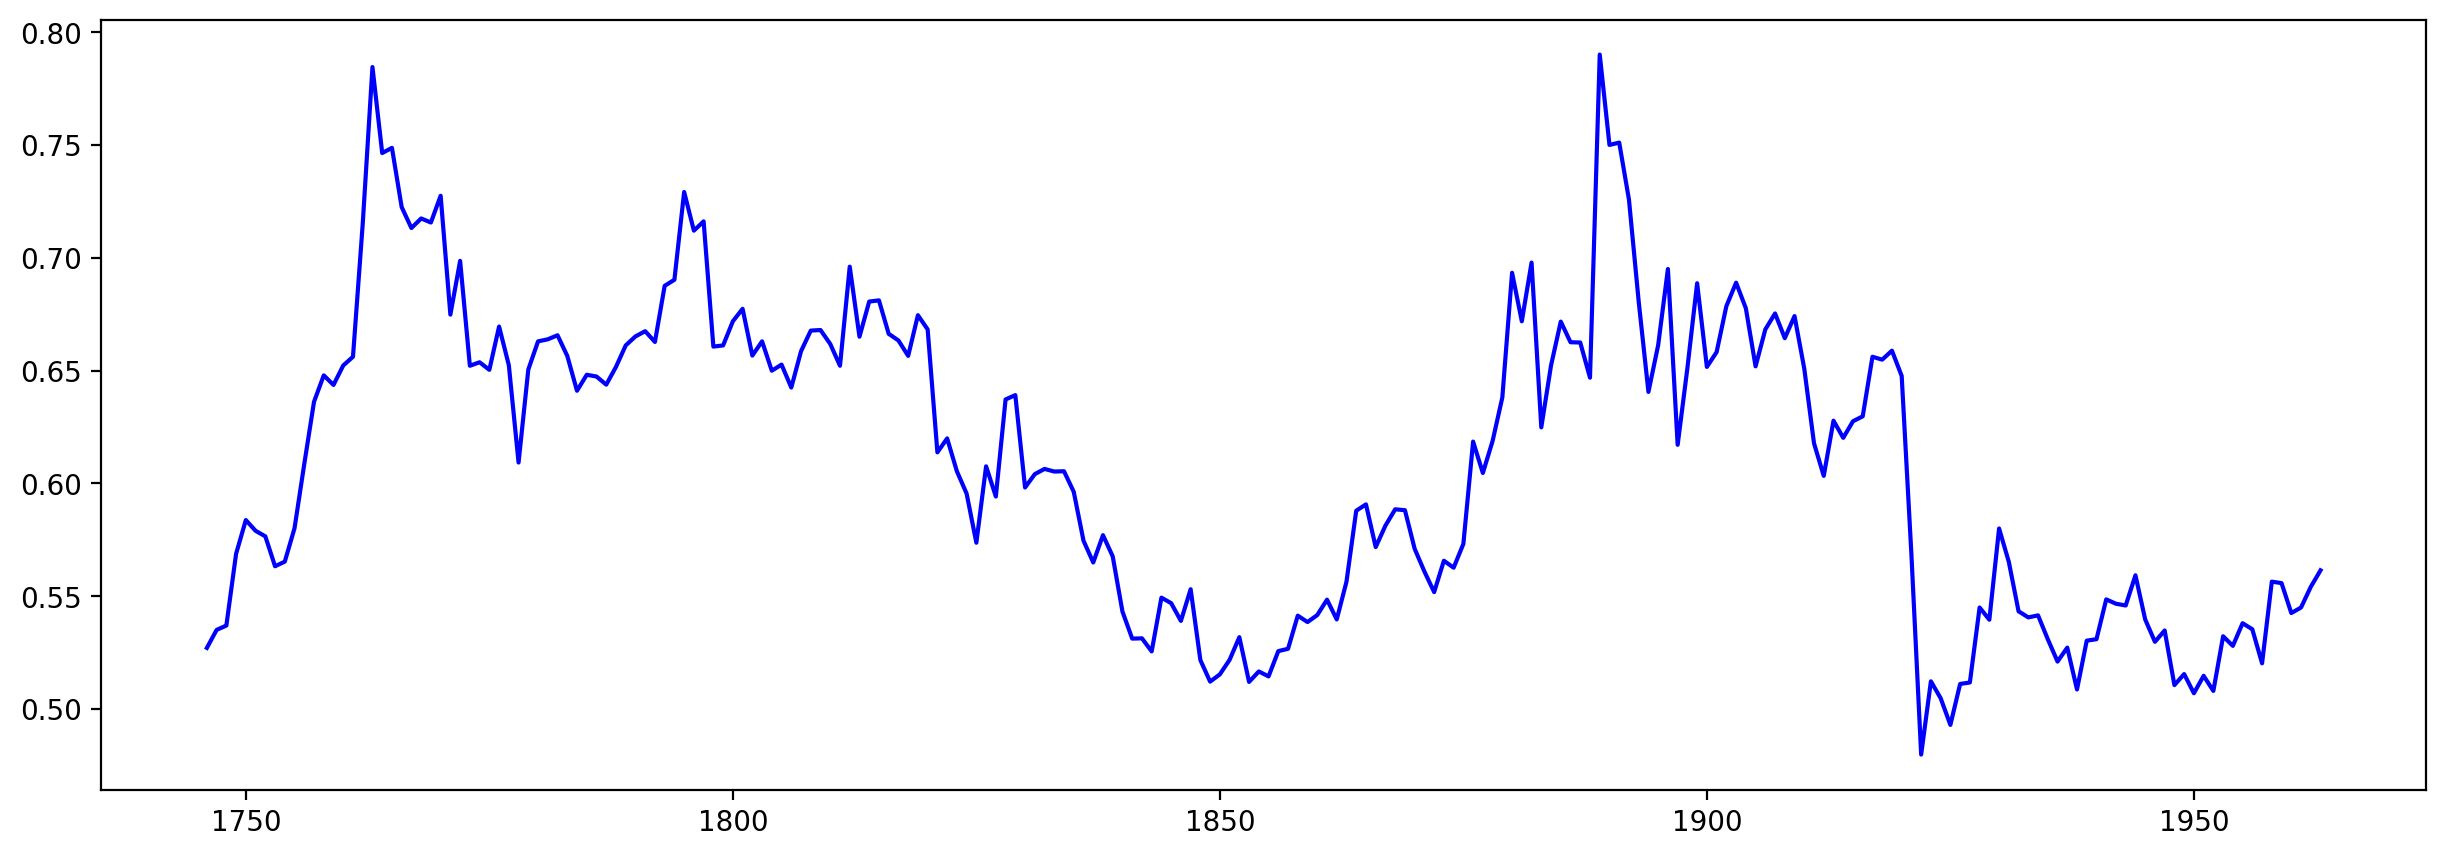

In [146]:
idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0]+y_test_all.shape[0]),
         y_test_all[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0]+y_test_pred_all.shape[0]),
         y_test_pred_all[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA (5,9,17))')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot();

Final Plot

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

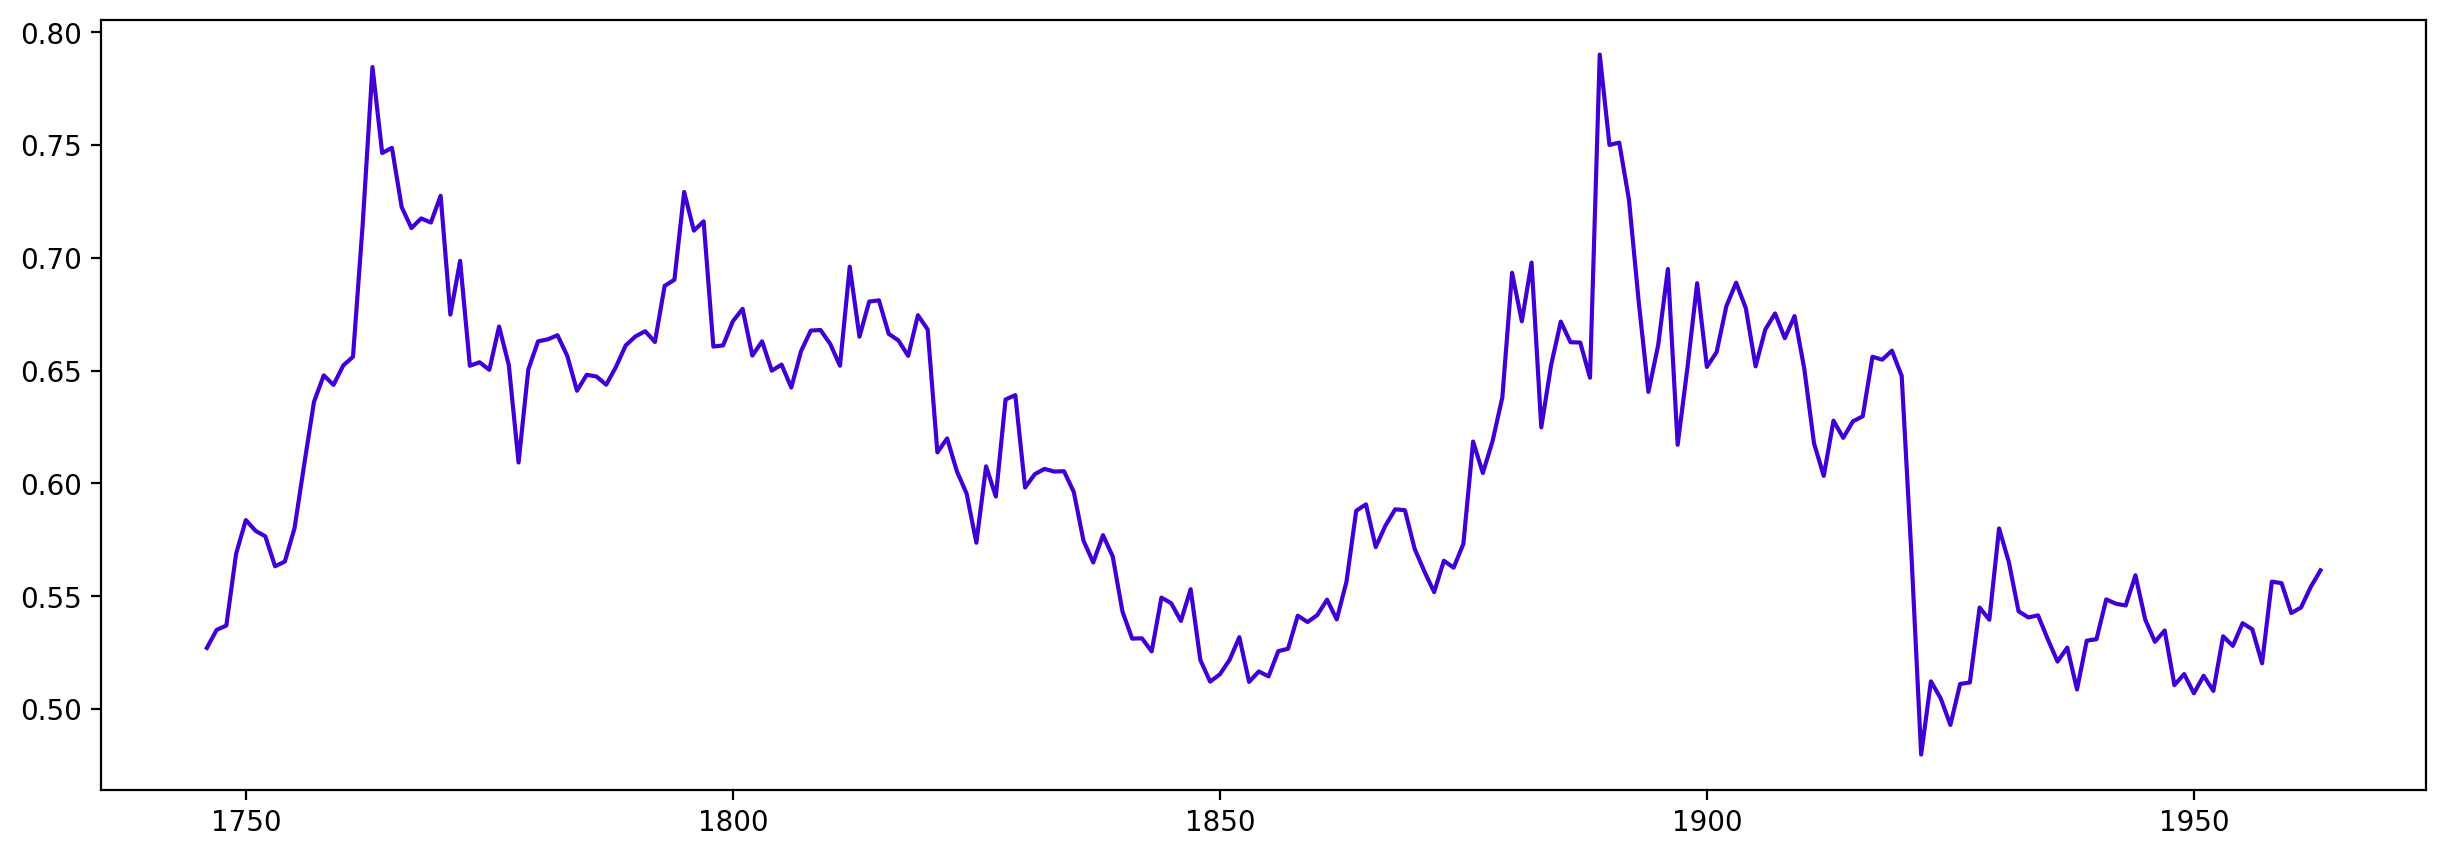

In [150]:
idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_5d.shape[0]),
         y_test_5d[:,idx], color='#4000D5', label='test target')

plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_pred_5d.shape[0]),
         y_test_pred_5d[:,idx], color='#A700D5', label='test prediction (SMA5)')

plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0]+y_test_pred_9d.shape[0]),
         y_test_pred_9d[:,idx], color='#D20103', label='test prediction (SMA9)')

plt.plot(np.arange(y_train_17d.shape[0], y_train_17d.shape[0]+y_test_pred_17d.shape[0]),
         y_test_pred_17d[:,idx], color='#00D5D2', label='test prediction (SMA17)')

plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0]+y_test_pred_all.shape[0]),
         y_test_pred_all[:,idx], color='#40D500', label='test prediction (All)')

plt.title('future XRPUSDT prices (With all SMAs)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot();

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

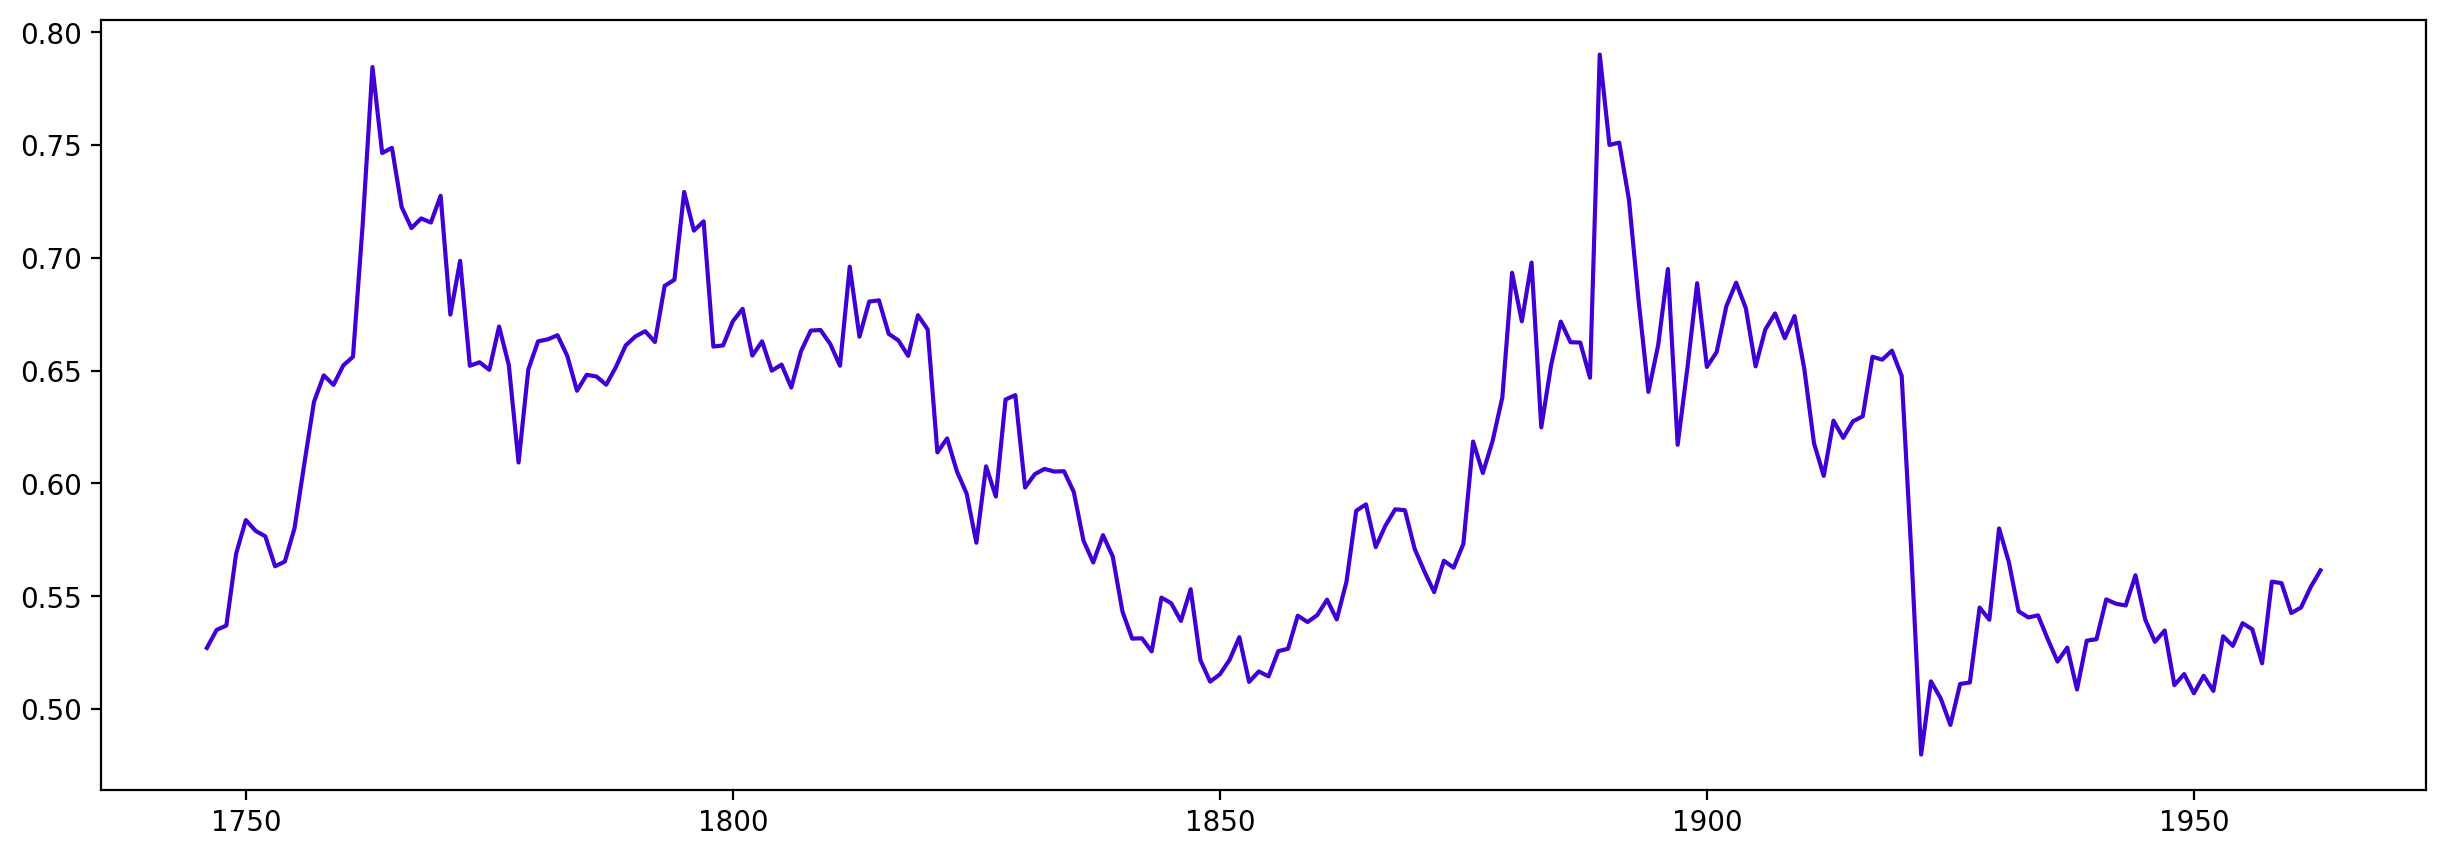

In [152]:
idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_5d.shape[0]),
         y_test_5d[:,idx], color='#4000D5', label='test target')

plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_pred_5d.shape[0]),
         y_test_pred_5d[:,idx], color='#A700D5', label='test prediction (SMA5)')

plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0]+y_test_pred_9d.shape[0]),
         y_test_pred_9d[:,idx], color='#D20103', label='test prediction (SMA9)')

plt.plot(np.arange(y_train_17d.shape[0], y_train_17d.shape[0]+y_test_pred_17d.shape[0]),
         y_test_pred_17d[:,idx], color='#00D5D2', label='test prediction (SMA17)')

plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0]+y_test_pred_all.shape[0]),
         y_test_pred_all[:,idx], color='#40D500', label='test prediction (All)')

plt.title('future XRPUSDT prices (With All SMAs)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.xlim(1940,1980)
plt.ylim(0.48,0.62)
plt.legend(loc='best')
plt.plot();